## Implementacion MergeSort en Go

In [27]:
!apt install golang

Reading package lists... Done
Building dependency tree       
Reading state information... Done
golang is already the newest version (2:1.10~4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [28]:
!go

Go is a tool for managing Go source code.

Usage:

	go command [arguments]

The commands are:

	build       compile packages and dependencies
	clean       remove object files and cached files
	doc         show documentation for package or symbol
	env         print Go environment information
	bug         start a bug report
	fix         update packages to use new APIs
	fmt         gofmt (reformat) package sources
	generate    generate Go files by processing source
	get         download and install packages and dependencies
	install     compile and install packages and dependencies
	list        list packages
	run         compile and run Go program
	test        test packages
	tool        run specified go tool
	version     print Go version
	vet         report likely mistakes in packages

Use "go help [command]" for more information about a command.

Additional help topics:

	c           calling between Go and C
	buildmode   build modes
	cache       build and test caching
	filetype    file t

In [32]:
%%writefile main.go
package main

import (
	"fmt"
	"io/ioutil"
	"math"
	"os"
	"sort"
	"strconv"
	"strings"
	"time"
)

func main() {
	//open file and load all into  variable
	b, err := ioutil.ReadFile("./iData50000.csv") // just pass the file name
	if err != nil {
		fmt.Print(err)
	}

	lista := strings.Split(string(b), "\n") // list of strings
	//convert all to int

	var list []int

	for _, s := range lista {
		intero, _ := strconv.Atoi(s)
		list = append(list, intero)
	}

	casos := []int{100,
		1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000,
		10000, 20000, 30000, 40000, 50000}

	//escribe los datos a un archivo
	// open output file
	fo, err := os.Create("MergeSort_go.csv")
	if err != nil {
		panic(err)
	}
	// close fo on exit and check for its returned error
	defer func() {
		if err := fo.Close(); err != nil {
			panic(err)
		}
	}()

	fmt.Println("size_D	Golang_mean_MergeSort	Golang_std_MergeSort")
	fmt.Fprintln(fo, "size_D	Golang_mean_MergeSort	Golang_std_MergeSort")
	for _, caso := range casos {
		avg, stddev := TPP(list, caso, 50)
		fmt.Printf("%d\t%.6f\t%.6f\n", caso, avg, stddev)
		fmt.Fprintf(fo, "%d\t%.6f\t%.6f\n", caso, avg, stddev)
	}

}

// ejecuta el ordenamiento de "list" de los   "n" primero elementos  "x" veces y retorna el avg y el stddev
func TPP(list []int, n int, x int) (float64, float64) {
	var TPP []float64

	for i := 0; i < x; i++ {
		data := list[:n]

		inicio := time.Now()
		t := time.Now()
		//heapSort(sort.IntSlice(data))
		MergeSort(sort.IntSlice(data))
		TP := t.Sub(inicio)
		TPP = append(TPP, float64(TP))
		//calculate the average

	}
	avg, stddev := stats(TPP)
	return avg / 1000000, stddev / 1000000

}

// calcula avg y stddev de una list
func stats(list []float64) (float64, float64) {

	var sum, avg, stddev float64

	numberOfElements := float64(len(list))
	for _, e := range list {
		sum += e
	}

	avg = sum / float64(numberOfElements)

	for _, e := range list {
		stddev += math.Pow(e-avg, 2)
	}

	// The use of Sqrt math function func Sqrt(x float64) float64
	stddev = math.Sqrt(stddev / numberOfElements)
	return avg, stddev
}


func MergeSort(slice []int) []int {

	if len(slice) < 2 {
		return slice
	}
	mid := (len(slice)) / 2
	return Merge(MergeSort(slice[:mid]), MergeSort(slice[mid:]))
}

// Merges left and right slice into newly created slice
func Merge(left, right []int) []int {

	size, i, j := len(left)+len(right), 0, 0
	slice := make([]int, size, size)
	count := 0

	for i < len(left) && j < len(right) {
		if left[i] <= right[j] {
			slice[count] = left[i]
			count, i = count+1, i+1
		} else {
			slice[count] = right[j]
			count, j = count+1, j+1
		}
	}
	for i < len(left) {
		slice[count] = left[i]
		count, i = count+1, i+1
	}
	for j < len(right) {
		slice[count] = right[j]
		count, j = count+1, j+1
	}

	return slice
}

func heapSort(list sort.Interface) {
	for start := (list.Len() - 2) / 2; start >= 0; start-- {
		siftDown(list, start, list.Len()-1)
	}
	for end := list.Len() - 1; end > 0; end-- {
		list.Swap(0, end)
		siftDown(list, 0, end-1)
	}
}

func siftDown(list sort.Interface, start, end int) {
	for root := start; root*2+1 <= end; {
		child := root*2 + 1
		if child+1 <= end && list.Less(child, child+1) {
			child++
		}
		if !list.Less(root, child) {
			return
		}
		list.Swap(root, child)
		root = child
	}
}

Overwriting main.go


In [34]:
!go run main.go

size_D	Golang_mean_MergeSort	Golang_std_MergeSort
100	0.000083	0.000016
1000	0.000093	0.000037
2000	0.000087	0.000033
3000	0.000086	0.000029
4000	0.000091	0.000020
5000	0.000093	0.000019
6000	0.000099	0.000016
7000	0.000101	0.000022
8000	0.000113	0.000028
9000	0.000111	0.000024
10000	0.000112	0.000031
20000	0.000114	0.000022
30000	0.000115	0.000027
40000	0.000113	0.000023
50000	0.000125	0.000026


Se genera archivo MergeSort_go.csv

## Implementacion MergeSort en C++

In [35]:
%%writefile mergesort.cpp
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <iostream>
#include <sstream>
#include <fstream>
#include <cstdio>
#include <ctime>
#include <iomanip>
#include<bits/stdc++.h>
using namespace std;


//  ************************************************************************************************
// el algoritmo Mergesort usa dos funciones merge y mergeSort
// Combinar 2 subarreglos L y M en arr
void merge(int arr[], int p, int q, int r) {
    // Crear L ← A[p..q] y M ← A[q+1..r]
    int n1 = q - p + 1;
    int n2 = r - q;

    int L[n1], M[n2];

    for (int i = 0; i < n1; i++)
        L[i] = arr[p + i];
    for (int j = 0; j < n2; j++)
        M[j] = arr[q + 1 + j];

    // Mantener indice actual de los subarreglos y el arreglo principal
    int i, j, k;
    i = 0;
    j = 0;
    k = p;

    // Hasta que lleguemos a cualquiera de los extremos de L o M, escoge el más grande entre
    // los elementos L y M y los colocamos en la posición correcta en A[p..r]
    while (i < n1 && j < n2) {
        if (L[i] <= M[j]) {
            arr[k] = L[i];
            i++;
        } else {
            arr[k] = M[j];
            j++;
        }
        k++;
    }

    // Cuando nos quedamos sin elementos en L o en M,
    // cogemos los elementos restantes y los ponemos en A[p..r]
    while (i < n1) {
        arr[k] = L[i];
        i++;
        k++;
    }

    while (j < n2) {
        arr[k] = M[j];
        j++;
        k++;
    }
}

// Dividir el arreglo en 2 subarreglos, luego ordenarlos y combinarlos
void mergeSort(int arr[], int l, int r) {
    if (l < r) {
        // m es el punto donde el arreglo es dividido en 2 sub arreglos
        int m = l + (r - l) / 2;

        mergeSort(arr, l, m);
        mergeSort(arr, m + 1, r);

        // Combinar los subarreglos ordenados
        merge(arr, l, m, r);
    }
}

//  ************************************************************************************************

// Imprimir Arreglo
void printArray(int arr[], int size) {
    for (int i = 0; i < size; i++)
        cout << arr[i] << " ";
    cout << endl;
}


const char* getfield(char* line, int num)
{
    const char* tok;
    for (tok = strtok(line, ";");
         tok && *tok;
         tok = strtok(NULL, ";\n"))
    {
        if (!--num)
            return tok;
    }
    return NULL;
}


int main()
{
    unsigned t0, t1;
    double prom[15];
    double desvStand[15];
    double duration;
    int yr[50000];
    double dur100[5],dur1k[5],dur2k[5],dur3k[5],dur4k[5],dur5k[5],dur6k[5],dur7k[5],dur8k[5],dur9k[5],dur10k[5];
    double dur20k[5],dur30k[5],dur40k[5],dur50k[5];
    int TP100[100], TP1000[1000], TP2000[2000],TP3000[3000],TP4000[4000],TP5000[5000],TP6000[6000],TP7000[7000];
    int TP8000[8000], TP9000[9000], TP10000[10000],TP20000[20000],TP30000[30000],TP40000[40000],TP50000[50000];
    int i=0;
    std::clock_t start;

    FILE* stream = fopen("Data50000.csv", "r");
    if(stream == NULL) {
        printf("Fallo al abrir el archivo Data50000.csv : %s\n", strerror(errno));
    }

    char line[1024];
    while (fgets(line, 1024, stream))
    {
        char* tmp = strdup(line);
        yr[i]=atoi(getfield(tmp, 1));
        i++;

        free(tmp);
    }
    // cout<<yr[0]<<endl;
    // cout<<yr[49999]<<endl;

    std::copy(yr, yr+100, TP100);
    std::copy(yr, yr+1000, TP1000);
    std::copy(yr, yr+2000, TP2000);
    std::copy(yr, yr+3000, TP3000);
    std::copy(yr, yr+4000, TP4000);
    std::copy(yr, yr+5000, TP5000);
    std::copy(yr, yr+6000, TP6000);
    std::copy(yr, yr+7000, TP7000);
    std::copy(yr, yr+8000, TP8000);
    std::copy(yr, yr+9000, TP9000);
    std::copy(yr, yr+10000, TP10000);
    std::copy(yr, yr+20000, TP20000);
    std::copy(yr, yr+30000, TP30000);
    std::copy(yr, yr+40000, TP40000);
    std::copy(yr, yr+50000, TP50000);

    int size100 = sizeof(TP100) / sizeof(TP100[0]);
    int size1k = sizeof(TP1000) / sizeof(TP1000[0]);
    int size2k = sizeof(TP2000) / sizeof(TP2000[0]);
    int size3k = sizeof(TP3000) / sizeof(TP3000[0]);
    int size4k = sizeof(TP4000) / sizeof(TP4000[0]);
    int size5k = sizeof(TP5000) / sizeof(TP5000[0]);
    int size6k = sizeof(TP6000) / sizeof(TP6000[0]);
    int size7k = sizeof(TP7000) / sizeof(TP7000[0]);
    int size8k = sizeof(TP8000) / sizeof(TP8000[0]);
    int size9k = sizeof(TP9000) / sizeof(TP9000[0]);
    int size10k = sizeof(TP10000) / sizeof(TP10000[0]);
    int size20k = sizeof(TP20000) / sizeof(TP20000[0]);
    int size30k = sizeof(TP30000) / sizeof(TP30000[0]);
    int size40k = sizeof(TP40000) / sizeof(TP40000[0]);
    int size50k = sizeof(TP50000) / sizeof(TP50000[0]);

    int i100 = 0;
    while (i100<5)
    {
        //  100
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP100, 0, size100 - 1);
        //cout << "Sorted array: \n";
        //printArray(TP100, size100);
        dur100[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  1k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP1000, 0, size1k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP1000, size1k);
        dur1k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  2k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP2000, 0, size2k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP2000, size2k);
        dur2k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  3k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP3000, 0, size3k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP3000, size3k);
        dur3k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  4k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP4000, 0, size4k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP4000, size4k);
        dur4k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  5k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP5000, 0, size5k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP5000, size5k);
        dur5k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  6k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP6000, 0, size6k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP6000, size6k);
        dur6k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  7k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP7000, 0, size7k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP7000, size7k);
        dur7k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  8k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP8000, 0, size8k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP8000, size8k);
        dur8k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  9k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP9000, 0, size9k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP100, size100);
        dur9k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  10k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP10000, 0, size10k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP10000, size10k);
        dur10k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  20k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP20000, 0, size20k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP20000, size20k);
        dur20k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  30k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP30000, 0, size30k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP100, size100);
        dur30k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  40k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP40000, 0, size40k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP100, size100);
        dur40k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //  50k
        start = std::clock();
        // Codigo a ejecutar
        mergeSort(TP50000, 0, size50k - 1);
        //cout << "Sorted array: \n";
        //printArray(TP100, size100);
        dur50k[i100] = ( std::clock() - start ) / (double) CLOCKS_PER_SEC;

        //cout<<fixed<<setprecision(8)<<"Execution Time 30k: "<< dur30k[i100] <<endl;
        //cout<<fixed<<setprecision(8)<<"Execution Time 50k: "<< dur50k[i100] <<endl;
        i100++;
    }

    int n=5;
    double sum100=0.0,sum1k=0.0,sum2k=0.0,sum3k=0.0,sum4k=0.0,sum5k=0.0,sum6k=0.0,sum7k=0.0;
    double sum8k=0.0,sum9k=0.0,sum10k=0.0,sum20k=0.0,sum30k=0.0,sum40k=0.0,sum50k=0.0;
    double sum100_a = 0.0,sum1k_a = 0.0,sum2k_a = 0.0,sum3k_a = 0.0,sum4k_a = 0.0,sum5k_a = 0.0;
    double sum6k_a = 0.0,sum7k_a = 0.0,sum8k_a = 0.0,sum9k_a = 0.0,sum10k_a = 0.0,sum20k_a = 0.0;
    double sum30k_a = 0.0,sum40k_a = 0.0,sum50k_a = 0.0;

    for(int i=0;i<n;i++){
        sum100 = sum100 + dur100[i];
        sum1k = sum1k + dur1k[i];
        sum2k = sum2k + dur2k[i];
        sum3k = sum3k + dur3k[i];
        sum4k = sum4k + dur4k[i];
        sum5k = sum5k + dur5k[i];
        sum6k = sum6k + dur6k[i];
        sum7k = sum7k + dur7k[i];
        sum8k = sum8k + dur8k[i];
        sum9k = sum9k + dur9k[i];
        sum10k = sum10k + dur10k[i];
        sum20k = sum20k + dur20k[i];
        sum30k = sum30k + dur30k[i];
        sum40k = sum40k + dur40k[i];
        sum50k = sum50k + dur50k[i];
    }

    double mean100 = (double)sum100/n;
    double mean1k = (double)sum1k/n;
    double mean2k = (double)sum2k/n;
    double mean3k = (double)sum3k/n;
    double mean4k = (double)sum4k/n;
    double mean5k = (double)sum5k/n;
    double mean6k = (double)sum6k/n;
    double mean7k = (double)sum7k/n;
    double mean8k = (double)sum8k/n;
    double mean9k = (double)sum9k/n;
    double mean10k = (double)sum10k/n;
    double mean20k = (double)sum20k/n;
    double mean30k = (double)sum30k/n;
    double mean40k = (double)sum40k/n;
    double mean50k = (double)sum50k/n;

    for(int i=0;i<n;i++){
        sum100_a = sum100_a + (dur100[i]-mean100)*(dur100[i]-mean100);
        sum1k_a = sum1k_a + (dur1k[i]-mean1k)*(dur1k[i]-mean1k);
        sum2k_a = sum2k_a + (dur2k[i]-mean2k)*(dur2k[i]-mean2k);
        sum3k_a = sum3k_a + (dur3k[i]-mean3k)*(dur3k[i]-mean3k);
        sum4k_a = sum4k_a + (dur4k[i]-mean4k)*(dur4k[i]-mean4k);
        sum5k_a = sum5k_a + (dur5k[i]-mean5k)*(dur5k[i]-mean5k);
        sum6k_a = sum6k_a + (dur6k[i]-mean6k)*(dur6k[i]-mean6k);
        sum7k_a = sum7k_a + (dur7k[i]-mean7k)*(dur7k[i]-mean7k);
        sum8k_a = sum8k_a + (dur8k[i]-mean8k)*(dur8k[i]-mean8k);
        sum9k_a = sum9k_a + (dur9k[i]-mean9k)*(dur9k[i]-mean9k);
        sum10k_a = sum10k_a + (dur10k[i]-mean10k)*(dur10k[i]-mean10k);
        sum20k_a = sum20k_a + (dur20k[i]-mean20k)*(dur20k[i]-mean20k);
        sum30k_a = sum30k_a + (dur30k[i]-mean30k)*(dur30k[i]-mean30k);
        sum40k_a = sum40k_a + (dur40k[i]-mean40k)*(dur40k[i]-mean40k);
        sum50k_a = sum50k_a + (dur50k[i]-mean50k)*(dur50k[i]-mean50k);
    }
    double variance100 = (double)sum100_a/n;
    double variance1k = (double)sum1k_a/n;
    double variance2k = (double)sum2k_a/n;
    double variance3k = (double)sum3k_a/n;
    double variance4k = (double)sum4k_a/n;
    double variance5k = (double)sum5k_a/n;
    double variance6k = (double)sum6k_a/n;
    double variance7k = (double)sum7k_a/n;
    double variance8k = (double)sum8k_a/n;
    double variance9k = (double)sum9k_a/n;
    double variance10k = (double)sum10k_a/n;
    double variance20k = (double)sum20k_a/n;
    double variance30k = (double)sum30k_a/n;
    double variance40k = (double)sum40k_a/n;
    double variance50k = (double)sum50k_a/n;


    double sD100 = sqrt(variance100);
    double sD1k = sqrt(variance1k);
    double sD2k = sqrt(variance2k);
    double sD3k = sqrt(variance3k);
    double sD4k = sqrt(variance4k);
    double sD5k = sqrt(variance5k);
    double sD6k = sqrt(variance6k);
    double sD7k = sqrt(variance7k);
    double sD8k = sqrt(variance8k);
    double sD9k = sqrt(variance9k);
    double sD10k = sqrt(variance10k);
    double sD20k = sqrt(variance20k);
    double sD30k = sqrt(variance30k);
    double sD40k = sqrt(variance40k);
    double sD50k = sqrt(variance50k);

    //printArray(TP20000, size20k);
    //cout<<"Mean 30k:  "<<mean30k<<endl;
    //cout<<"Standard deviation 40k: "<<sD40k;

    double result[15][3]={{100,mean100,sD100},
                              {1000,mean1k,sD1k},
                              {2000,mean2k,sD2k},
                              {3000,mean3k,sD3k},
                              {4000,mean4k,sD4k},
                              {5000,mean5k,sD5k},
                              {6000,mean6k,sD6k},
                              {7000,mean7k,sD7k},
                              {8000,mean8k,sD8k},
                              {9000,mean9k,sD9k},
                              {10000,mean10k,sD10k},
                              {20000,mean20k,sD20k},
                              {30000,mean30k,sD30k},
                              {40000,mean40k,sD40k},
                              {50000,mean50k,sD50k}

    };

    ofstream outfile;
    outfile.open("MergeSort_c++.csv");
    for(int i=0;i<15;i++)
    {
        outfile << result[i][0];
        for(int j=1;j<3;j++)
        {

                outfile << ", " << result[i][j];;

        }
        outfile << endl;
    }
    cout<<"Se genero archivo MergeSort_c++.csv";
    outfile.close();

}


Overwriting mergesort.cpp


In [36]:
!g++ mergesort.cpp && ./a.out

Se genero archivo MergeSort_c++.csv

## Implementacion MergeSort en Python

In [38]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [39]:
def merge_sort(lista):

    if len(lista) < 2:
        return lista

    # De lo contrario, se divide en 2
    else:
        middle = len(lista) // 2
        right = merge_sort(lista[:middle])
        left = merge_sort(lista[middle:])
        return merge(right, left)
        
def merge(lista1, lista2):

    i, j = 0, 0  # Variables de incremento
    result = []  # Lista de resultado

    # Intercalar ordenadamente
    while (i < len(lista1) and j < len(lista2)):
        if (lista1[i] < lista2[j]):
            result.append(lista1[i])
            i += 1
        else:
            result.append(lista2[j])
            j += 1

    # Agregamos los resultados a la lista
    result += lista1[i:]
    result += lista2[j:]

    # Retornamos el resultados
    return result

In [42]:
df = pd.read_csv('iData50000.csv')
df = list(df['Datos_aleatorios'])

In [43]:
TP100 = []
i100 = 0
while i100<5:
    data = df[:100]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP100.append(TP)
    i100 += 1

TP1000 = []
i1000 = 0
while i1000<5:
    data = df[:1000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP1000.append(TP)
    i1000 += 1

TP2000 = []
i2000 = 0
while i2000<5:
    data = df[:2000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP2000.append(TP)
    i2000 += 1

TP3000 = []
i3000 = 0
while i3000<5:
    data = df[:3000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP3000.append(TP)
    i3000 += 1


TP4000 = []
i4000 = 0
while i4000<5:
    data = df[:4000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP4000.append(TP)
    i4000 += 1


TP5000 = []
i5000 = 0
while i5000<5:
    data = df[:5000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP5000.append(TP)
    i5000 += 1

TP6000 = []
i6000 = 0
while i6000<5:
    data = df[:6000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP6000.append(TP)
    i6000 += 1

TP7000 = []
i7000 = 0
while i7000<5:
    data = df[:7000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP7000.append(TP)
    i7000 += 1

TP8000 = []
i8000 = 0
while i8000<5:
    data = df[:8000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP8000.append(TP)
    i8000 += 1

TP9000 = []
i9000 = 0
while i9000<5:
    data = df[:9000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP9000.append(TP)
    i9000 += 1

TP10000 = []
i10000 = 0
while i10000<5:
    data = df[:10000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP10000.append(TP)
    i10000 += 1

TP20000 = []
i20000 = 0
while i20000<5:
    data = df[:20000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP20000.append(TP)
    i20000 += 1

TP30000 = []
i30000 = 0
while i30000<5:
    data = df[:30000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP30000.append(TP)
    i30000 += 1

TP40000 = []
i40000 = 0
while i40000<5:
    data = df[:40000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP40000.append(TP)
    i40000 += 1

TP50000 = []
i50000 = 0
while i50000<5:
    data = df[:50000]
    inicio = time.time()
    merge_sort_result = merge_sort(data)
    fin = time.time()
    TP = fin-inicio
    TP50000.append(TP)
    i50000 += 1


TPP100 = np.mean(TP100)
TPP1000 = np.mean(TP1000)
TPP2000 = np.mean(TP2000)
TPP3000 = np.mean(TP3000)
TPP4000 = np.mean(TP4000)
TPP5000 = np.mean(TP5000)
TPP6000 = np.mean(TP6000)
TPP7000 = np.mean(TP7000)
TPP8000 = np.mean(TP8000)
TPP9000 = np.mean(TP9000)
TPP10000 = np.mean(TP10000)
TPP20000 = np.mean(TP20000)
TPP30000 = np.mean(TP30000)
TPP40000 = np.mean(TP40000)
TPP50000 = np.mean(TP50000)

TPP100_std = np.std(TP100)
TPP1000_std = np.std(TP1000)
TPP2000_std = np.std(TP2000)
TPP3000_std = np.std(TP3000)
TPP4000_std = np.std(TP4000)
TPP5000_std = np.std(TP5000)
TPP6000_std = np.std(TP6000)
TPP7000_std = np.std(TP7000)
TPP8000_std = np.std(TP8000)
TPP9000_std = np.std(TP9000)
TPP10000_std = np.std(TP10000)
TPP20000_std = np.std(TP20000)
TPP30000_std = np.std(TP30000)
TPP40000_std = np.std(TP40000)
TPP50000_std = np.std(TP50000)

In [44]:
MergeSortAlgo = pd.DataFrame()
MergeSortAlgo['size_D'] = ['100', '1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '20000', '30000', '40000', '50000']
MergeSortAlgo['Python_mean_MergeSort'] = [TPP100, TPP1000, TPP2000, TPP3000, TPP4000, TPP5000, TPP6000, TPP7000, TPP8000, TPP9000, TPP10000, TPP20000, TPP30000, TPP40000, TPP50000]
MergeSortAlgo['Python_std_MergeSort'] = [TPP100_std, TPP1000_std, TPP2000_std, TPP3000_std, TPP4000_std, TPP5000_std, TPP6000_std, TPP7000_std, TPP8000_std, TPP9000_std, TPP10000_std, TPP20000_std, TPP30000_std, TPP40000_std, TPP50000_std]
MergeSortAlgo

,size_D,Python_mean_MergeSort,Python_std_MergeSort
0,100,0.000303,0.000008
1,1000,0.004241,0.000062
2,2000,0.009230,0.000146
3,3000,0.014717,0.000384
4,4000,0.020847,0.001502
5,5000,0.029228,0.003743
6,6000,0.031280,0.000499
7,7000,0.037319,0.001077
8,8000,0.043424,0.001824
9,9000,0.050214,0.001805


In [45]:
MergeSortAlgo.to_csv('MergeSort_Py.csv')

## Cargar los Resultados (Archivos CSV) con Python para graficar

In [46]:
data_c = pd.read_csv('MergeSort_c++.csv',header=None,names = ["size_D","C++_mean_MergeSort","C++_std_MergeSort"])
data_c

,size_D,C++_mean_MergeSort,C++_std_MergeSort
0,100,0.000010,0.000003
1,1000,0.000108,0.000026
2,2000,0.000228,0.000054
3,3000,0.000357,0.000083
4,4000,0.000489,0.000112
5,5000,0.000622,0.000143
6,6000,0.000752,0.000181
7,7000,0.000887,0.000218
8,8000,0.001037,0.000279
9,9000,0.001167,0.000302


In [47]:
data_py = pd.read_csv('MergeSort_Py.csv')
data_py

,Unnamed: 0,size_D,Python_mean_MergeSort,Python_std_MergeSort
0,0,100,0.000303,0.000008
1,1,1000,0.004241,0.000062
2,2,2000,0.009230,0.000146
3,3,3000,0.014717,0.000384
4,4,4000,0.020847,0.001502
5,5,5000,0.029228,0.003743
6,6,6000,0.031280,0.000499
7,7,7000,0.037319,0.001077
8,8,8000,0.043424,0.001824
9,9,9000,0.050214,0.001805


In [48]:
# Cargando el archivo resultado de Golang
data_go = pd.read_csv('MergeSort_go.csv', sep='\t')
data_go

,size_D,Golang_mean_MergeSort,Golang_std_MergeSort
0,100,0.000083,0.000016
1,1000,0.000093,0.000037
2,2000,0.000087,0.000033
3,3000,0.000086,0.000029
4,4000,0.000091,0.000020
5,5000,0.000093,0.000019
6,6000,0.000099,0.000016
7,7000,0.000101,0.000022
8,8000,0.000113,0.000028
9,9000,0.000111,0.000024


In [49]:
# Uniendo en un solo DataSet
data_py_c = data_py.merge(data_c , on = 'size_D', how='left')
data_comp = data_py_c.merge(data_go , on = 'size_D', how='left')
data_comp

,Unnamed: 0,size_D,Python_mean_MergeSort,Python_std_MergeSort,C++_mean_MergeSort,C++_std_MergeSort,Golang_mean_MergeSort,Golang_std_MergeSort
0,0,100,0.000303,0.000008,0.000010,0.000003,0.000083,0.000016
1,1,1000,0.004241,0.000062,0.000108,0.000026,0.000093,0.000037
2,2,2000,0.009230,0.000146,0.000228,0.000054,0.000087,0.000033
3,3,3000,0.014717,0.000384,0.000357,0.000083,0.000086,0.000029
4,4,4000,0.020847,0.001502,0.000489,0.000112,0.000091,0.000020
5,5,5000,0.029228,0.003743,0.000622,0.000143,0.000093,0.000019
6,6,6000,0.031280,0.000499,0.000752,0.000181,0.000099,0.000016
7,7,7000,0.037319,0.001077,0.000887,0.000218,0.000101,0.000022
8,8,8000,0.043424,0.001824,0.001037,0.000279,0.000113,0.000028
9,9,9000,0.050214,0.001805,0.001167,0.000302,0.000111,0.000024


## GRAFICO EN C++

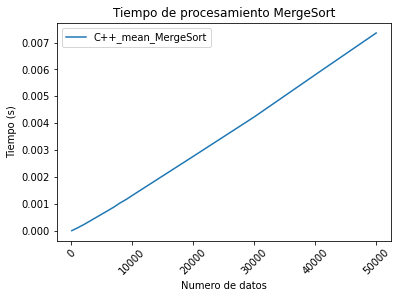

In [59]:
#plt.plot(data_comp['size_D'], data_comp['Python_mean_MergeSort'], label='Python_mean_MergeSort')
#plt.plot(data_comp['size_D'], data_comp['Golang_mean_MergeSort'], label='Golang_mean_MergeSort')
plt.plot(data_comp['size_D'], data_comp['C++_mean_MergeSort'], label='C++_mean_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_MergeSort.JPG')
plt.show()

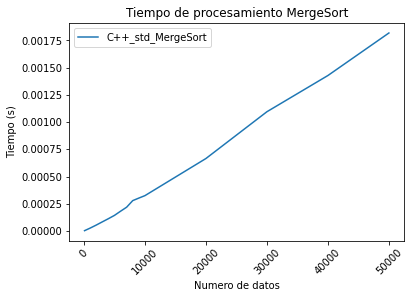

In [60]:

#plt.plot(data_comp['size_D'], data_comp['Python_std_MergeSort'], label='Python_std_MergeSort')
#plt.plot(data_comp['size_D'], data_comp['Golang_std_MergeSort'], label='Golang_std_MergeSort')
plt.plot(data_comp['size_D'], data_comp['C++_std_MergeSort'], label='C++_std_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_MergeSort.JPG')
plt.show()

## GRAFICO GO

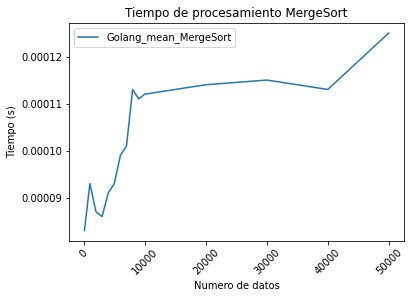

In [61]:
#plt.plot(data_comp['size_D'], data_comp['Python_mean_MergeSort'], label='Python_mean_MergeSort')
plt.plot(data_comp['size_D'], data_comp['Golang_mean_MergeSort'], label='Golang_mean_MergeSort')
#plt.plot(data_comp['size_D'], data_comp['C++_mean_MergeSort'], label='C++_mean_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_MergeSort.JPG')
plt.show()

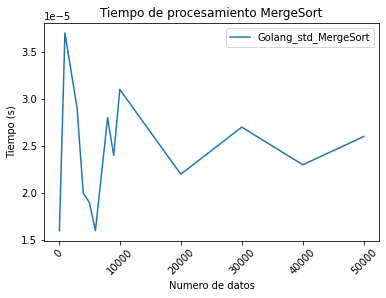

In [62]:
#plt.plot(data_comp['size_D'], data_comp['Python_std_MergeSort'], label='Python_std_MergeSort')
plt.plot(data_comp['size_D'], data_comp['Golang_std_MergeSort'], label='Golang_std_MergeSort')
#plt.plot(data_comp['size_D'], data_comp['C++_std_MergeSort'], label='C++_std_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_MergeSort.JPG')
plt.show()

## GRAFICO EN PYTHON

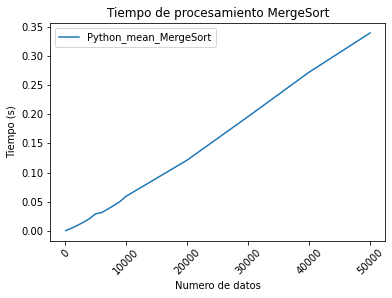

In [63]:
plt.plot(data_comp['size_D'], data_comp['Python_mean_MergeSort'], label='Python_mean_MergeSort')
#plt.plot(TPheapsort['size_D'], TPheapsort['Python_std_MergeSort'], label='Python_std_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_MergeSort.JPG')
plt.show()

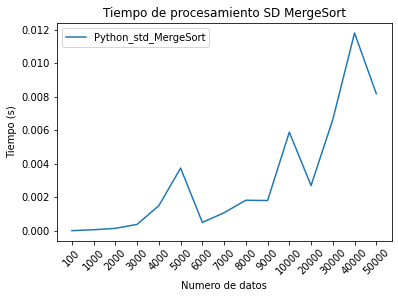

In [64]:

plt.plot(MergeSortAlgo['size_D'], MergeSortAlgo['Python_std_MergeSort'], label='Python_std_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento SD MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_SD_MergeSort.JPG')
plt.show()

## COMPARATIVO DE GRAFICOS

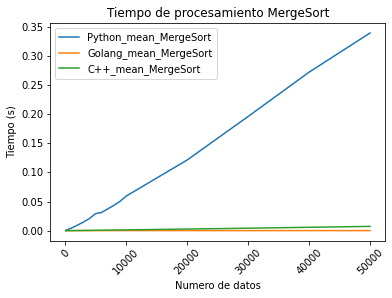

In [65]:
plt.plot(data_comp['size_D'], data_comp['Python_mean_MergeSort'], label='Python_mean_MergeSort')
plt.plot(data_comp['size_D'], data_comp['Golang_mean_MergeSort'], label='Golang_mean_MergeSort')
plt.plot(data_comp['size_D'], data_comp['C++_mean_MergeSort'], label='C++_mean_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_MergeSort.JPG')
plt.show()

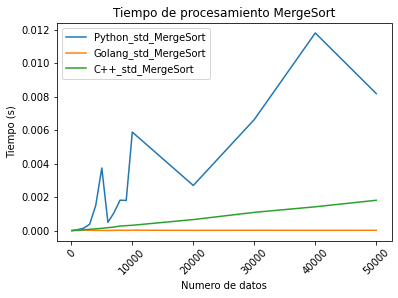

In [66]:
plt.plot(data_comp['size_D'], data_comp['Python_std_MergeSort'], label='Python_std_MergeSort')
plt.plot(data_comp['size_D'], data_comp['Golang_std_MergeSort'], label='Golang_std_MergeSort')
plt.plot(data_comp['size_D'], data_comp['C++_std_MergeSort'], label='C++_std_MergeSort')
plt.xlabel('Numero de datos')
plt.xticks(rotation=45)
plt.ylabel('Tiempo (s)')
plt.title("Tiempo de procesamiento MergeSort")
plt.legend()
plt.savefig('Tiempo_de_procesamiento_MergeSort.JPG')
plt.show()